In [44]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.ticker import FuncFormatter

In [20]:
df = pd.read_csv('Exportacao_BigQuery_DadosCovid.csv')

In [21]:
df.head()

,ano,mes,semana,estado,estado_sem_acento,urbano_rural,idade,sexo,cor_raca,restricao_contato,...,valor_aposentadoria,valor_pensao,valor_bolsa_familia,valor_beneficios,valor_auxilios,valor_seguro_desemprego,valor_outros_rendimentos,soma_rendimentos,emprestimo,casa_propria_alugada_outros
0,2020,7,1,Amapá,Amapa,Urbana,47,Homem,Parda,Ficou em casa e só saiu em caso de necessidade...,...,NaN,NaN,NaN,NaN,1295.0,NaN,NaN,2395,Não solicitou,Próprio - já pago
1,2020,7,1,Amapá,Amapa,Urbana,34,Mulher,Branca,Ficou em casa e só saiu em caso de necessidade...,...,NaN,NaN,NaN,NaN,1295.0,NaN,NaN,2340,Não solicitou,Próprio - já pago
2,2020,7,2,Amapá,Amapa,Urbana,8,Homem,Parda,Ficou rigorosamente em casa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Não solicitou,Próprio - já pago
3,2020,7,2,Amapá,Amapa,Urbana,33,Mulher,Preta,Ficou em casa e só saiu em caso de necessidade...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000,Não solicitou,Próprio - já pago
4,2020,7,4,Amapá,Amapa,Urbana,20,Homem,Parda,"Reduziu o contato com as pessoas, mas continuo...",...,NaN,NaN,NaN,NaN,1800.0,NaN,NaN,3000,Não solicitou,Próprio - já pago


In [79]:
df.shape[0]

1157984

In [80]:
df.dtypes

,0
ano,int64
mes,int64
semana,int64
estado,object
estado_sem_acento,object
urbano_rural,object
idade,int64
sexo,object
cor_raca,object
restricao_contato,object


In [46]:
total_participantes = len(df)
print(f"A quantidade de participantes é: {total_participantes}")

A quantidade de participantes é: 1157984


In [81]:
contagem_resultados = df.groupby('resultado_teste_covid').size().reset_index(name='Quant')

total_participantes = len(df)
contagem_resultados['Porcentagem sobre o total'] = (contagem_resultados['Quant'] * 100 / total_participantes).round(2).astype(str) + '%'

contagem_resultados.rename(columns={
    'resultado_teste_covid': 'Resultado do Teste',
    'Quant': 'Quantidade'
}, inplace=True)

print(contagem_resultados)


  Resultado do Teste  Quantidade Porcentagem sobre o total
0           Negativo     1135499                    98.06%
1           Positivo       22485                     1.94%


In [ ]:
contagem_resultados.to_csv('ContagemDosResultados.csv', index=False, encoding='utf-8')

In [58]:
contagem_resultados = (
    df.groupby(['mes', 'resultado_teste_covid'])
    .size()
    .reset_index(name='Quant')
)

contagem_resultados['Mês'] = contagem_resultados['mes'].map({7: 'Julho', 8: 'Agosto', 9: 'Setembro'})

contagem_resultados.rename(columns={'resultado_teste_covid': 'Resultado'}, inplace=True)

contagem_resultados['Porcentagem'] = (contagem_resultados['Quant'] * 100 / total_participantes).round(1).astype(str) + '%'

contagem_resultados = contagem_resultados[['Mês', 'Resultado', 'Quant', 'Porcentagem']]

contagem_resultados.sort_values(by='Mês', ascending=True, inplace=True)

print(contagem_resultados)

        Mês Resultado   Quant Porcentagem
2    Agosto  Negativo  378881       32.7%
3    Agosto  Positivo    7639        0.7%
0     Julho  Negativo  378839       32.7%
1     Julho  Positivo    5327        0.5%
4  Setembro  Negativo  377779       32.6%
5  Setembro  Positivo    9519        0.8%


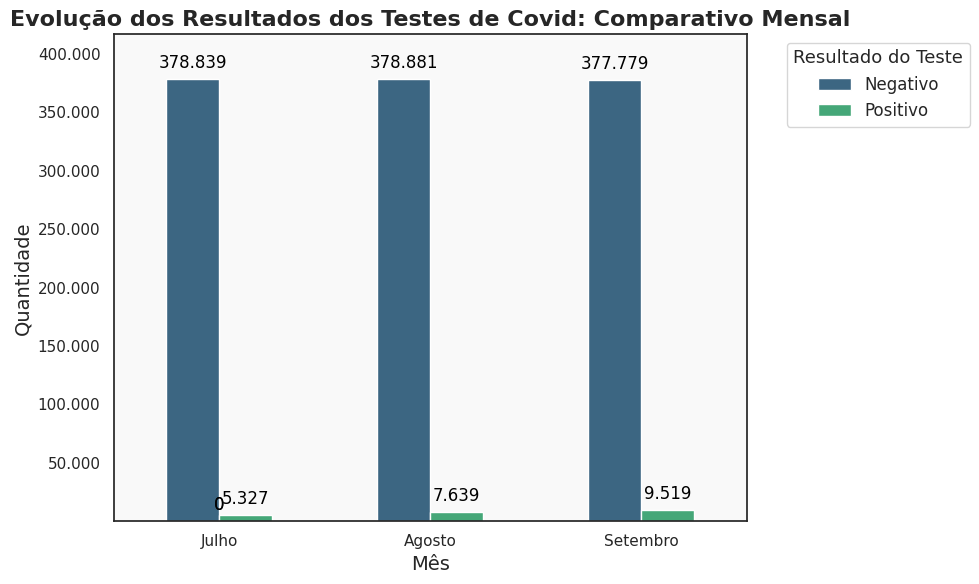

In [78]:
def formatar_valor(x, _):
    return f'{int(x):,.0f}'.replace(',', '.')

sns.set(style="white")

ordem_meses = ['Julho', 'Agosto', 'Setembro']
contagem_resultados['Mês'] = pd.Categorical(contagem_resultados['Mês'], categories=ordem_meses, ordered=True)

contagem_resultados = contagem_resultados[contagem_resultados['Quant'] > 0]

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    data=contagem_resultados,
    x='Mês',
    y='Quant',
    hue='Resultado',
    palette='viridis',
    edgecolor='white',
    width=0.5  )

for p in barras.patches:
    barras.annotate(f'{int(p.get_height()):,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Evolução dos Resultados dos Testes de Covid: Comparativo Mensal', fontsize=16, weight='bold', loc='center')
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)

plt.ylim(1, contagem_resultados['Quant'].max() * 1.1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor))

plt.legend(title='Resultado do Teste', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(visible=False)

plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

In [88]:
df_teste_positivo = df[df['resultado_teste_covid'] == 'Positivo']

df_estado = df_teste_positivo.groupby('estado').size().reset_index(name='quantidade')

df_estado

,estado,quantidade
0,Acre,564
1,Alagoas,842
2,Amapá,480
3,Amazonas,1100
4,Bahia,724
5,Ceará,1210
6,Distrito Federal,745
7,Espírito Santo,975
8,Goiás,1094
9,Maranhão,1740


<ipython-input-90-498353f5e5e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


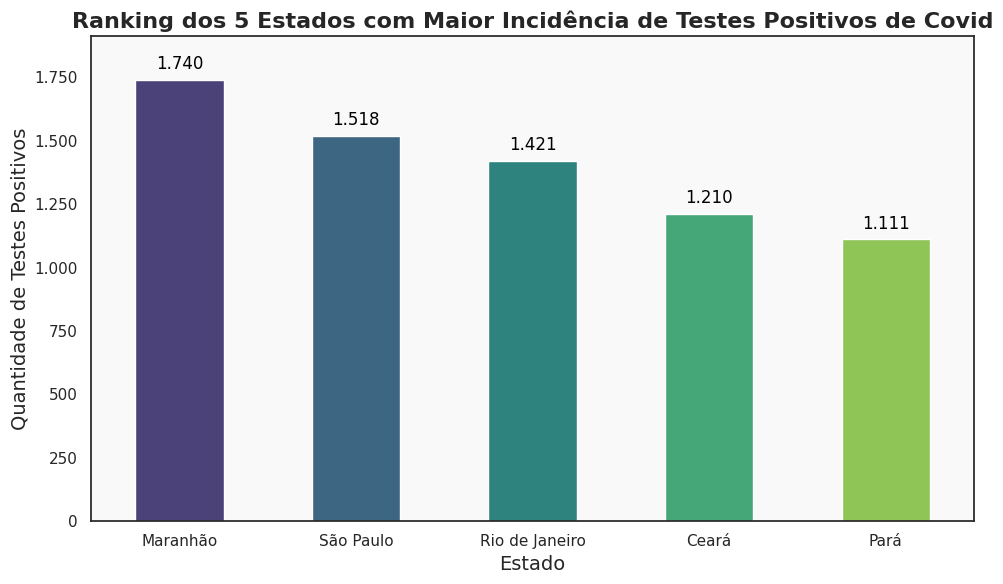

In [90]:
top_5_estados = df_estado.nlargest(5, 'quantidade')

def formatar_valor(x, _):
    return f'{int(x):,.0f}'.replace(',', '.')

sns.set(style="white")

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    data=top_5_estados,
    x='estado',
    y='quantidade',
    palette='viridis',
    edgecolor='white',
    width=0.5
)

for p in barras.patches:
    barras.annotate(f'{int(p.get_height()):,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Ranking dos 5 Estados com Maior Incidência de Testes Positivos de Covid', fontsize=16, weight='bold', loc='center')
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Quantidade de Testes Positivos', fontsize=14)

plt.ylim(0, top_5_estados['quantidade'].max() * 1.1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor))

plt.grid(visible=False)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

In [91]:
df_teste_negativo = df[df['resultado_teste_covid'] == 'Positivo']

df_estado = df_teste_negativo.groupby('estado').size().reset_index(name='quantidade')

df_estado

,estado,quantidade
0,Acre,564
1,Alagoas,842
2,Amapá,480
3,Amazonas,1100
4,Bahia,724
5,Ceará,1210
6,Distrito Federal,745
7,Espírito Santo,975
8,Goiás,1094
9,Maranhão,1740


<ipython-input-92-c8ec41078ab0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


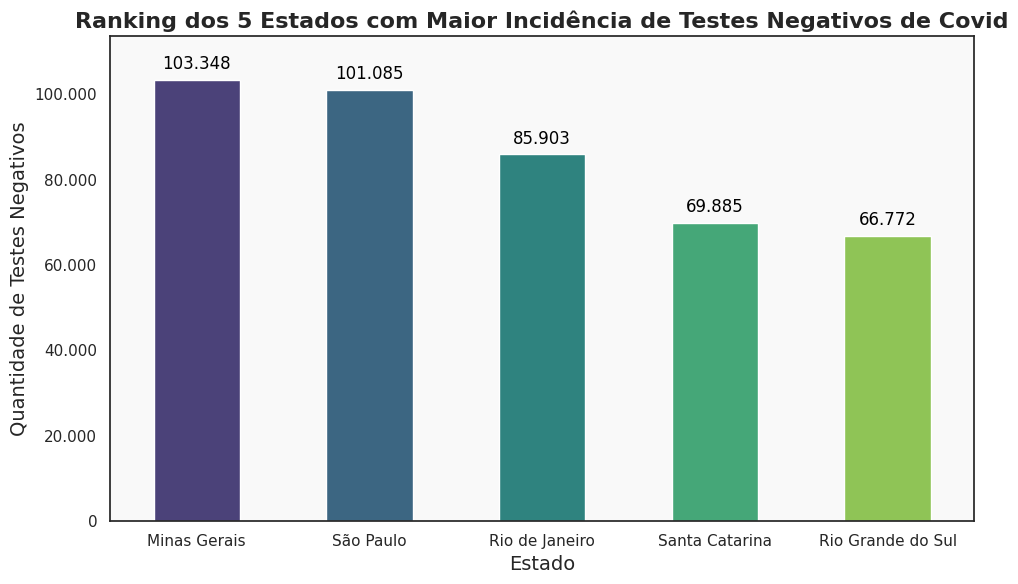

In [92]:
top_5_estados_negativos = df[df['resultado_teste_covid'] == 'Negativo'].groupby('estado').size().reset_index(name='quantidade').nlargest(5, 'quantidade')

def formatar_valor(x, _):
    return f'{int(x):,.0f}'.replace(',', '.')

sns.set(style="white")

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    data=top_5_estados_negativos,
    x='estado',
    y='quantidade',
    palette='viridis',
    edgecolor='white',
    width=0.5
)

for p in barras.patches:
    barras.annotate(f'{int(p.get_height()):,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Ranking dos 5 Estados com Maior Incidência de Testes Negativos de Covid', fontsize=16, weight='bold', loc='center')
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Quantidade de Testes Negativos', fontsize=14)

plt.ylim(0, top_5_estados_negativos['quantidade'].max() * 1.1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor))

plt.grid(visible=False)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

In [95]:
restricao_contato = df['restricao_contato'].unique()
restricao_contato

array(['Ficou em casa e só saiu em caso de necessidade básica',
       'Ficou rigorosamente em casa',
       'Reduziu o contato com as pessoas, mas continuou saindo de casa para trabalho ou atividades não essenciais e/ou recebendo visitas',
       'Não fez restrição, levou vida normal como antes da pandemia',
       'Ignorado'], dtype=object)

In [104]:
contagem_restricoes = df['restricao_contato'].value_counts().reset_index()
contagem_restricoes.columns = ['Restrição de Contato', 'Quantidade']

total = contagem_restricoes['Quantidade'].sum()
contagem_restricoes['Porcentagem sobre o total'] = ((contagem_restricoes['Quantidade'] / total) * 100).round(2)

contagem_restricoes['Porcentagem sobre o total'] = contagem_restricoes['Porcentagem sobre o total'].astype(str) + '%'

print(contagem_restricoes)

                                Restrição de Contato  Quantidade  \
0  Ficou em casa e só saiu em caso de necessidade...      499967   
1  Reduziu o contato com as pessoas, mas continuo...      393638   
2                        Ficou rigorosamente em casa      231646   
3  Não fez restrição, levou vida normal como ante...       26157   
4                                           Ignorado        6576   

  Porcentagem sobre o total  
0                    43.18%  
1                    33.99%  
2                     20.0%  
3                     2.26%  
4                     0.57%  


In [105]:
contagem_restricoes.to_csv('ContagemDeRestricoes.csv', index=False, encoding='utf-8')

<ipython-input-109-ed3ba9431bf4>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


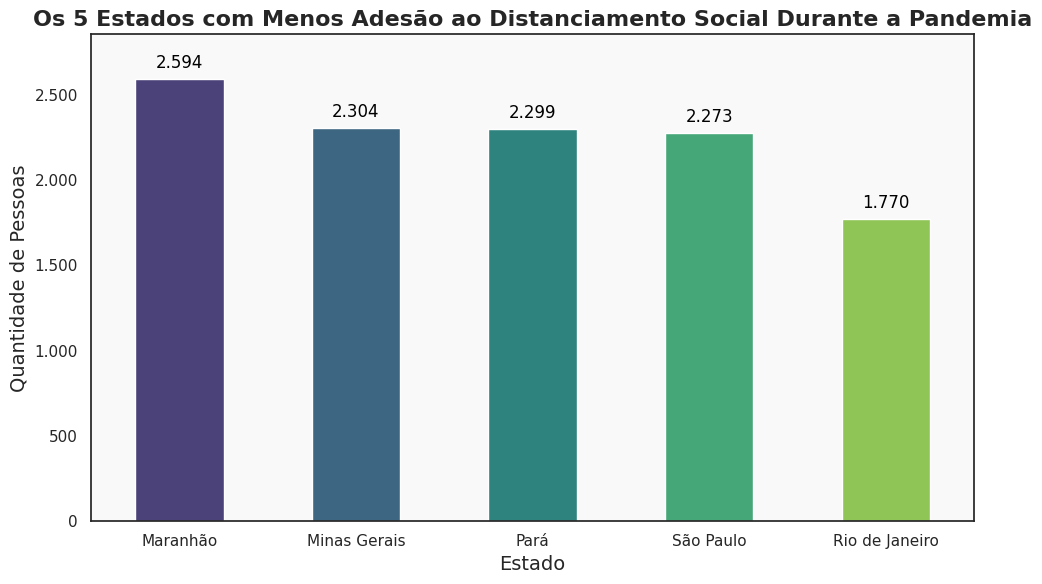

In [109]:
df_restricao_nenhuma = df[df['restricao_contato'] == 'Não fez restrição, levou vida normal como antes da pandemia']

estado_restricao = df_restricao_nenhuma['estado'].value_counts().reset_index()
estado_restricao.columns = ['estado', 'quantidade']

top_5_estados = estado_restricao.nlargest(5, 'quantidade')

def formatar_valor(x, _):
    return f'{int(x):,.0f}'.replace(',', '.')

sns.set(style="white")

plt.figure(figsize=(10, 6))
barras = sns.barplot(
    data=top_5_estados,
    x='estado',
    y='quantidade',
    palette='viridis',
    edgecolor='white',
    width=0.5
)

for p in barras.patches:
    barras.annotate(f'{int(p.get_height()):,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Os 5 Estados com Menos Adesão ao Distanciamento Social Durante a Pandemia', fontsize=16, weight='bold', loc='center')
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Quantidade de Pessoas', fontsize=14)

plt.ylim(0, top_5_estados['quantidade'].max() * 1.1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valor))

plt.grid(visible=False)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

In [113]:
zero_rendimentos = (df['soma_rendimentos'] == 0).sum()

algum_rendimento = (df['soma_rendimentos'] != 0).sum()

resultados = pd.DataFrame({
    'Rendimentos': ['Igual a 0', 'Diferente de 0'],
    'Quantidade': [zero_rendimentos, algum_rendimento]
})

print(resultados)

      Rendimentos  Quantidade
0       Igual a 0      106419
1  Diferente de 0     1051565


<ipython-input-144-e0d13401ace9>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barras = sns.barplot(


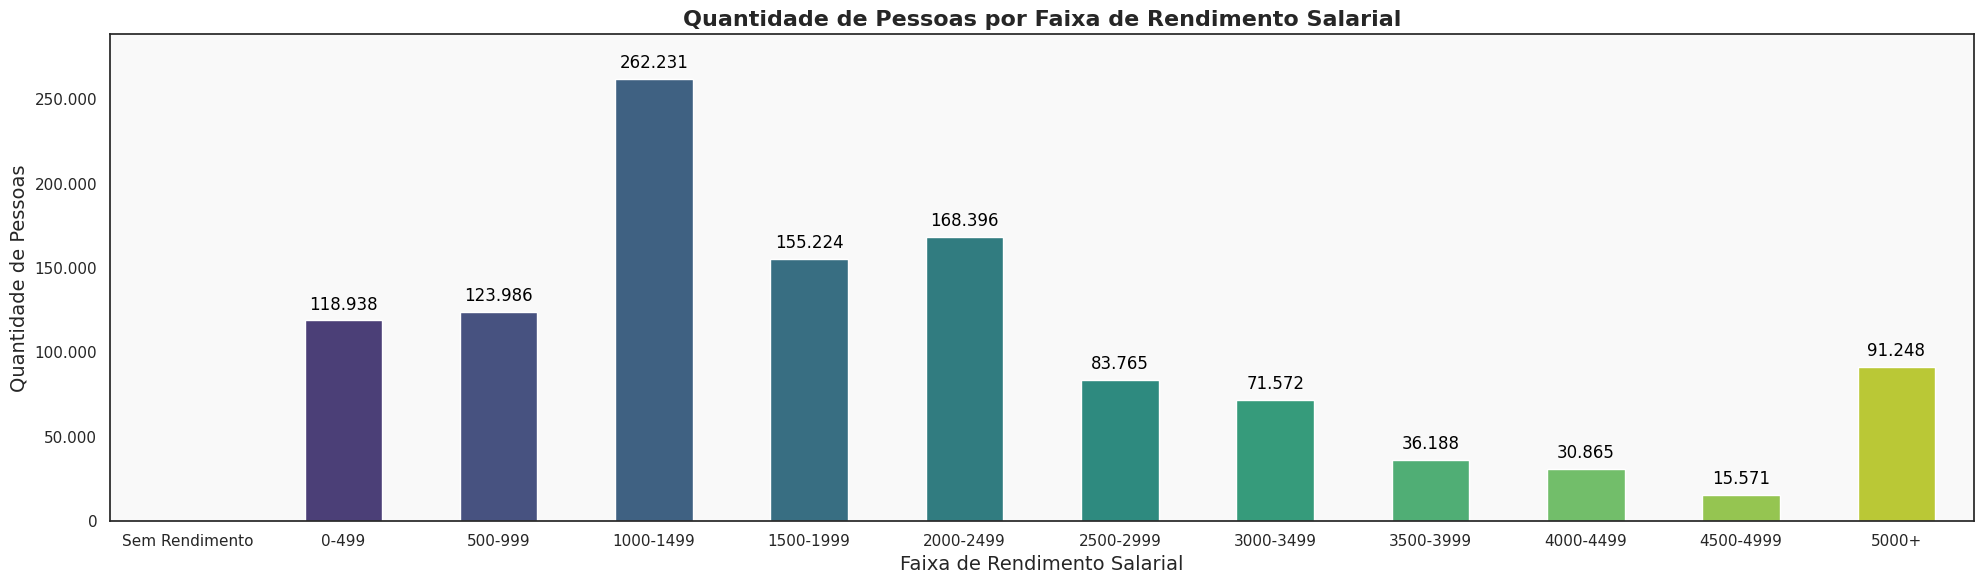

In [144]:
max_rendimento = df['soma_rendimentos'].max()
bins = list(range(0, 5001, 500)) + [max_rendimento + 1]
bins = [-1] + bins

labels = ['Sem Rendimento'] + [f'{bins[i]}-{bins[i+1]-1}' for i in range(1, len(bins)-1)]
labels[-1] = f'{bins[-2]}+'

df['faixa_rendimento'] = pd.cut(df['soma_rendimentos'], bins=bins, labels=labels, right=False)

resultado_faixa = df['faixa_rendimento'].value_counts().sort_index().reset_index()
resultado_faixa.columns = ['Faixa de Rendimento', 'Quantidade de Pessoas']

resultado_faixa = resultado_faixa[resultado_faixa['Faixa de Rendimento'] != 'Sem Rendimento']

sns.set(style="white")

plt.figure(figsize=(20, 6))
barras = sns.barplot(
    data=resultado_faixa,
    x='Faixa de Rendimento',
    y='Quantidade de Pessoas',
    palette='viridis',
    edgecolor='white',
    width=0.5
)

for p in barras.patches:
    barras.annotate(f'{int(p.get_height()):,.0f}'.replace(',', '.'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color='black',
                    xytext=(0, 5),
                    textcoords='offset points')

plt.title('Quantidade de Pessoas por Faixa de Rendimento Salarial', fontsize=16, weight='bold', loc='center')
plt.xlabel('Faixa de Rendimento Salarial', fontsize=14)
plt.ylabel('Quantidade de Pessoas', fontsize=14)

plt.ylim(0, resultado_faixa['Quantidade de Pessoas'].max() * 1.1)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.grid(visible=False)
plt.gca().set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

In [146]:
print(resultado_faixa)

   Faixa de Rendimento  Quantidade de Pessoas
1                0-499                 118938
2              500-999                 123986
3            1000-1499                 262231
4            1500-1999                 155224
5            2000-2499                 168396
6            2500-2999                  83765
7            3000-3499                  71572
8            3500-3999                  36188
9            4000-4499                  30865
10           4500-4999                  15571
11               5000+                  91248


In [145]:
sem_faixa = df[df['faixa_rendimento'].isnull()].shape[0]
print(f'Participantes sem faixa: {sem_faixa}')

Participantes sem faixa: 0
